In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.vision.gan import *
from ipyexperiments import *
exp1 = IPyExperimentsPytorch()


*** Experiment started with the Pytorch backend
Device: ID 0, GeForce RTX 2060 (6144 RAM)


*** Current state:
RAM:    Used    Free   Total       Util
CPU:     985  13,598  24,509 MB   4.02% 
GPU:   2,482   3,661   6,144 MB  40.41% 


･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.065
･ CPU:          0          0        985 MB |
･ GPU:          0          0      2,482 MB |


In [13]:
# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.000
･ CPU:          0          0      2,335 MB |
･ GPU:          6          0      3,231 MB |


In [3]:
path = Path("celeba/img_align_celeba")

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.000
･ CPU:          0          0        985 MB |
･ GPU:          5          0      2,487 MB |


In [4]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
               .split_none()
               .label_from_func(noop)
               .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
               .databunch(bs=bs)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.002
･ CPU:          0          0        985 MB |
･ GPU:          0          0      2,487 MB |


In [5]:
data = get_data(128, 64)

C:\Users\Madis\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Madis\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The de

C:\Users\Madis\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Madis\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The de

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:02.144
･ CPU:         63          6      1,053 MB |
･ GPU:         -6          0      2,481 MB |


C:\Users\Madis\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Madis\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The de

C:\Users\Madis\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Madis\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The de

C:\Users\Madis\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Madis\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The de

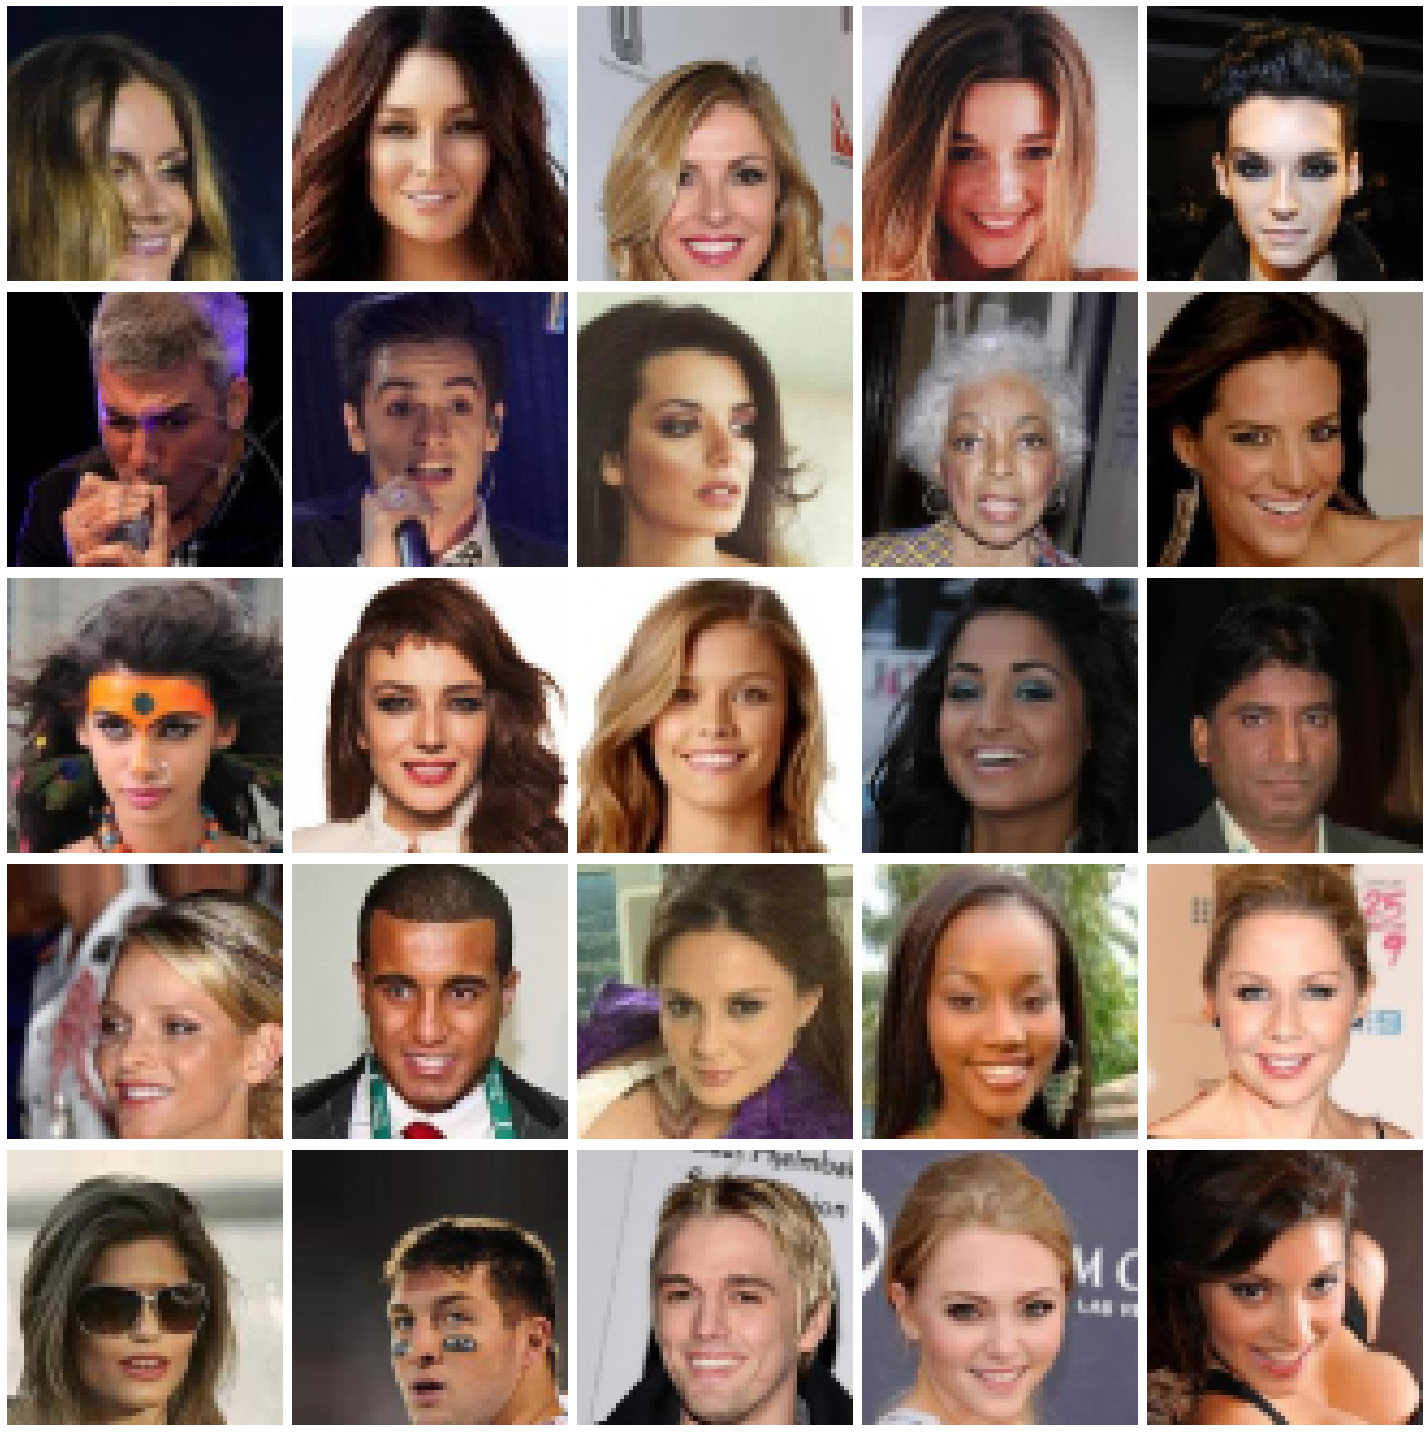

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:01.608
･ CPU:          0         16      1,086 MB |
･ GPU:         20         22      2,502 MB |


In [6]:
data.show_batch(rows=5)

In [20]:
def gan_loss_from_func(loss_gen, loss_crit, weights_gen:Tuple[float,float]=None):
    "Define loss functions for a GAN from `loss_gen` and `loss_crit`."
    def _loss_G(fake_pred, output, target, weights_gen=weights_gen):
        ones = fake_pred.new_ones(fake_pred.shape[0])
        weights_gen = ifnone(weights_gen, (1.,1.))
        return weights_gen[0] * loss_crit(fake_pred, ones) + weights_gen[1] * loss_gen(output, target)

    def _loss_C(real_pred, fake_pred):
        ones  = real_pred.new_ones (real_pred.shape[0])
        zeros = fake_pred.new_zeros(fake_pred.shape[0])
        return (loss_crit(real_pred, ones) + loss_crit(fake_pred, zeros)) / 2

    return _loss_G, _loss_C

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.003
･ CPU:          0          0      2,358 MB |
･ GPU:         15          0      2,995 MB |


In [14]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.004
･ CPU:          0          0      2,335 MB |
･ GPU:         -4          0      3,227 MB |


In [15]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.003
･ CPU:          0          0      2,335 MB |
･ GPU:         -8          0      3,218 MB |


In [17]:
generator = Generator(1)
critic    = Discriminator(1)

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.030
･ CPU:          0          0      2,357 MB |
･ GPU:         -6          0      2,970 MB |


In [21]:
losses = gan_loss_from_func(nn.BCELoss(), nn.BCELoss(), weights_gen=(0,0.02))
learn = GANLearner(data, generator, critic, *losses ,switch_eval=False, opt_func = partial(optim.Adam, betas = (0.5,0.99)))

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.016
･ CPU:          0          0      2,334 MB |
･ GPU:        -36          3      2,958 MB |


In [22]:


learn.fit(5,2e-4)



epoch,train_loss,valid_loss,gen_loss,disc_loss,time


C:\Users\Madis\Anaconda3\envs\fastai\lib\site-packages\torch\nn\modules\loss.py:516: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1, 1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


RuntimeError: the derivative for 'target' is not implemented

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:43.219
･ CPU:          0         41      2,341 MB |
･ GPU:        272      1,289      3,231 MB |
